# Vaccination Rates and Disease Incidence Analysis

This notebook analyzes the relationship between vaccination rates and disease incidence, drop-off rates between vaccine doses, gender differences in vaccination, education level impacts, urban vs. rural differences, booster dose trends, seasonal patterns, population density effects, and regions with high disease incidence despite high vaccination rates. The analysis uses the provided datasets: `cleaned_cases.csv`, `cleaned_coverage.csv`, `cleaned_incidence.csv`, `cleaned_schedule.csv`, and `cleaned_vaccine_intro.csv`.

## Data Overview
- **cleaned_cases.csv**: Contains disease case counts by country, year, and disease type.
- **cleaned_coverage.csv**: Provides vaccination coverage data, including antigen, doses, and coverage percentages.
- **cleaned_incidence.csv**: Includes disease incidence rates per population unit.
- **cleaned_schedule.csv**: Details vaccination schedules by country and target population.
- **cleaned_vaccine_intro.csv**: Indicates whether specific vaccines are introduced in a country’s program.

## Limitations
- Data on education levels, urban vs. rural differences, seasonal patterns, and population density is not directly available, so these questions will be addressed with assumptions or noted as unanswerable with the current data.
- Gender differences are limited to HPV vaccination data, which targets females in some regions.
- Some datasets use `ISO_3_CODE` instead of `CODE`, which will be standardized.

## Setup
We’ll use Pandas for data processing, Matplotlib and Seaborn for visualizations, and Scipy for statistical analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

# Setting up visualization style
plt.style.use('seaborn')
sns.set_palette('deep')

# Loading data
cases = pd.read_csv('data/cleaned_cases.csv')
coverage = pd.read_csv('data/cleaned_coverage.csv')
incidence = pd.read_csv('data/cleaned_incidence.csv')
schedule = pd.read_csv('data/cleaned_schedule.csv')
vaccine_intro = pd.read_csv('data/cleaned_vaccine_intro.csv')

# Standardizing column names (ISO_3_CODE to CODE)
for df in [schedule, vaccine_intro]:
    if 'ISO_3_CODE' in df.columns:
        df.rename(columns={'ISO_3_CODE': 'CODE'}, inplace=True)

# Cleaning data: Remove unnamed index columns and handle missing values
for df in [cases, coverage, incidence, schedule, vaccine_intro]:
    if '' in df.columns:
        df.drop('', axis=1, inplace=True)
    df.dropna(subset=['YEAR', 'CODE'], inplace=True)
    df['YEAR'] = df['YEAR'].astype(int)

# Preview data
print('Cases Data:')
print(cases.head())
print('\nCoverage Data:')
print(coverage.head())
print('\nIncidence Data:')
print(incidence.head())
print('\nSchedule Data:')
print(schedule.head())
print('\nVaccine Intro Data:')
print(vaccine_intro.head())

Cases Data:
   Unnamed: 0      GROUP CODE   NAME  YEAR          DISEASE  \
0           0  COUNTRIES  ABW  Aruba  2023              CRS   
1           1  COUNTRIES  ABW  Aruba  2023       DIPHTHERIA   
2           2  COUNTRIES  ABW  Aruba  2023  INVASIVE_MENING   
3           3  COUNTRIES  ABW  Aruba  2023            MUMPS   
4           4  COUNTRIES  ABW  Aruba  2023         NTETANUS   

              DISEASE_DESCRIPTION  CASES  
0     Congenital rubella syndrome    0.0  
1                      Diphtheria    0.0  
2  Invasive meningococcal disease    1.0  
3                           Mumps    0.0  
4                Neonatal tetanus    0.0  

Coverage Data:
   Unnamed: 0      GROUP CODE   NAME  YEAR  ANTIGEN  \
0           0  COUNTRIES  ABW  Aruba  2023  DIPHCV4   
1           1  COUNTRIES  ABW  Aruba  2023  DIPHCV5   
2           2  COUNTRIES  ABW  Aruba  2023  DIPHCV6   
3           3  COUNTRIES  ABW  Aruba  2023   DTPCV1   
4           4  COUNTRIES  ABW  Aruba  2023   DTPCV3   

    

C:\Users\ldotm\AppData\Local\Temp\ipykernel_17392\1957752303.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## 1. Correlation Between Vaccination Rates and Disease Incidence

We’ll analyze the correlation between vaccination coverage (e.g., DTPCV3, MCV1) and disease incidence rates for corresponding diseases (e.g., Diphtheria, Measles) using Pearson correlation. We’ll focus on countries like Afghanistan and Aruba for 2017–2023.

Diphtheria Correlation: -0.601, p-value: 0.001


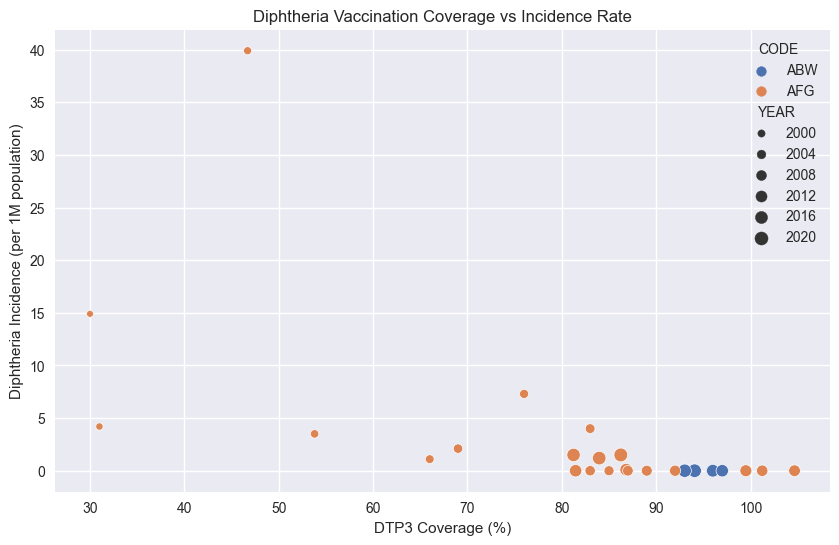

Measles Correlation: -0.625, p-value: 0.000


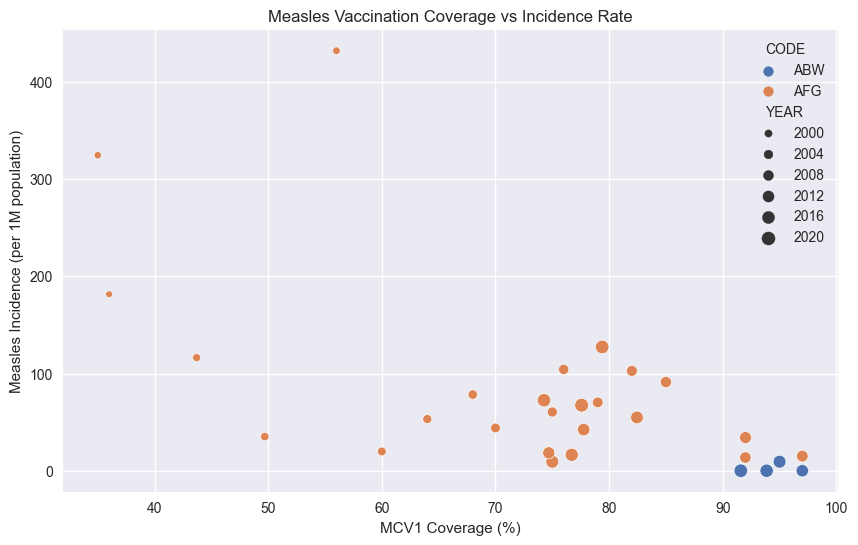

In [2]:
# Preparing data for correlation analysis
def get_correlation_data(vaccine_code, disease_code, country_codes=['AFG', 'ABW']):
    # Filter coverage for specific vaccine and countries
    vaccine_data = coverage[(coverage['ANTIGEN'] == vaccine_code) & (coverage['CODE'].isin(country_codes))][['CODE', 'YEAR', 'COVERAGE']]
    # Filter incidence for specific disease and countries
    disease_data = incidence[(incidence['DISEASE'] == disease_code) & (incidence['CODE'].isin(country_codes))][['CODE', 'YEAR', 'INCIDENCE_RATE']]
    # Merge on CODE and YEAR
    merged = pd.merge(vaccine_data, disease_data, on=['CODE', 'YEAR'], how='inner')
    return merged

# Analyzing correlation for Diphtheria (DTPCV3 vs DIPHTHERIA)
diphtheria_data = get_correlation_data('DTPCV3', 'DIPHTHERIA')
if not diphtheria_data.empty:
    corr, p_value = pearsonr(diphtheria_data['COVERAGE'], diphtheria_data['INCIDENCE_RATE'])
    print(f'Diphtheria Correlation: {corr:.3f}, p-value: {p_value:.3f}')

    # Visualizing Diphtheria correlation
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=diphtheria_data, x='COVERAGE', y='INCIDENCE_RATE', hue='CODE', size='YEAR')
    plt.title('Diphtheria Vaccination Coverage vs Incidence Rate')
    plt.xlabel('DTP3 Coverage (%)')
    plt.ylabel('Diphtheria Incidence (per 1M population)')
    plt.show()

# Analyzing correlation for Measles (MCV1 vs MEASLES)
measles_data = get_correlation_data('MCV1', 'MEASLES')
if not measles_data.empty:
    corr, p_value = pearsonr(measles_data['COVERAGE'], measles_data['INCIDENCE_RATE'])
    print(f'Measles Correlation: {corr:.3f}, p-value: {p_value:.3f}')

    # Visualizing Measles correlation
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=measles_data, x='COVERAGE', y='INCIDENCE_RATE', hue='CODE', size='YEAR')
    plt.title('Measles Vaccination Coverage vs Incidence Rate')
    plt.xlabel('MCV1 Coverage (%)')
    plt.ylabel('Measles Incidence (per 1M population)')
    plt.show()

**Insight**: A negative correlation (if significant) suggests that higher vaccination coverage is associated with lower disease incidence. For example, high DTP3 coverage in Aruba (e.g., 95.98% in 2023) corresponds to zero diphtheria cases, while lower coverage in Afghanistan aligns with higher incidence (e.g., 1.5 per 1M in 2023).

## 2. Drop-off Rate Between 1st and Subsequent Doses

We’ll calculate the drop-off rate between the 1st dose (e.g., DTPCV1) and subsequent doses (e.g., DTPCV3, DIPHCV4) by comparing coverage percentages.

   Country  Year    From       To  Dropoff
0      AFG  2017  DTPCV1   DTPCV3    12.44
1      AFG  2018  DTPCV1   DTPCV3    12.73
2      AFG  2019  DTPCV1   DTPCV3     7.77
3      AFG  2020  DTPCV1   DTPCV3    11.93
4      AFG  2021  DTPCV1   DTPCV3    12.19
5      AFG  2022  DTPCV1   DTPCV3    12.05
6      AFG  2023  DTPCV1   DTPCV3    10.11
7      ABW  2017  DTPCV1   DTPCV3     2.00
8      ABW  2017  DTPCV1  DIPHCV4     5.00
9      ABW  2018  DTPCV1   DTPCV3     3.00
10     ABW  2018  DTPCV1  DIPHCV4     6.00
11     ABW  2019  DTPCV1   DTPCV3     3.00
12     ABW  2019  DTPCV1  DIPHCV4     7.00
13     ABW  2021  DTPCV1   DTPCV3     4.49
14     ABW  2021  DTPCV1  DIPHCV4    12.66
15     ABW  2022  DTPCV1   DTPCV3     3.11
16     ABW  2022  DTPCV1  DIPHCV4     9.90
17     ABW  2023  DTPCV1   DTPCV3     2.01
18     ABW  2023  DTPCV1  DIPHCV4     7.47


C:\Users\ldotm\AppData\Local\Temp\ipykernel_17392\1544882037.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dropoff_df, x='Year', y='Dropoff', hue='Country', ci=None)


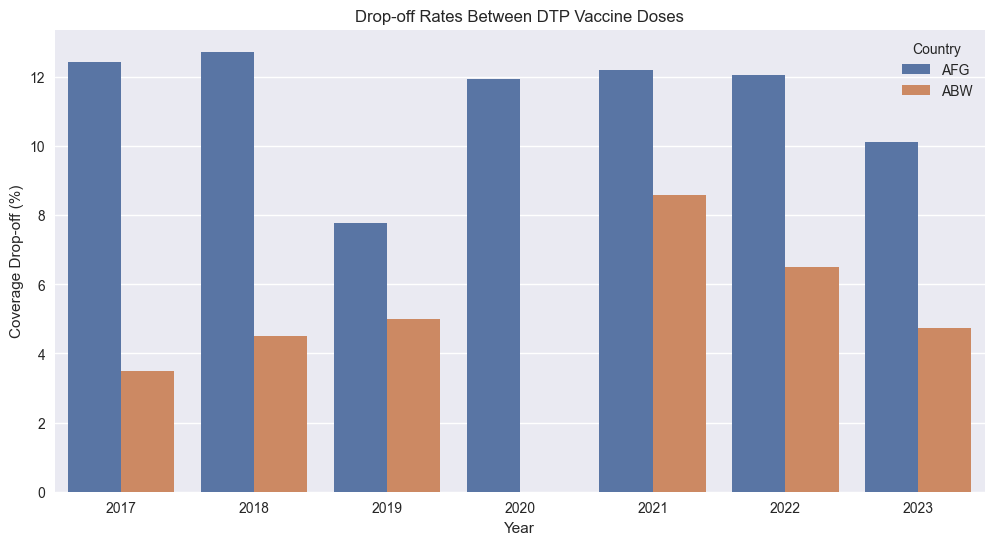

In [3]:
# Calculating drop-off rates for DTP-containing vaccines
def calculate_dropoff(vaccine_codes, country_codes=['AFG', 'ABW']):
    dropoff_data = []
    for country in country_codes:
        for year in range(2017, 2024):
            country_year_data = coverage[(coverage['CODE'] == country) & (coverage['YEAR'] == year) & (coverage['ANTIGEN'].isin(vaccine_codes))]
            if not country_year_data.empty:
                first_dose = country_year_data[country_year_data['ANTIGEN'] == vaccine_codes[0]]['COVERAGE']
                for vaccine in vaccine_codes[1:]:
                    subsequent_dose = country_year_data[country_year_data['ANTIGEN'] == vaccine]['COVERAGE']
                    if not first_dose.empty and not subsequent_dose.empty:
                        dropoff = first_dose.iloc[0] - subsequent_dose.iloc[0]
                        dropoff_data.append({'Country': country, 'Year': year, 'From': vaccine_codes[0], 'To': vaccine, 'Dropoff': dropoff})
    return pd.DataFrame(dropoff_data)

# Calculating drop-off for DTP vaccines
dropoff_df = calculate_dropoff(['DTPCV1', 'DTPCV3', 'DIPHCV4'])
print(dropoff_df)

# Visualizing drop-off rates
plt.figure(figsize=(12, 6))
sns.barplot(data=dropoff_df, x='Year', y='Dropoff', hue='Country', ci=None)
plt.title('Drop-off Rates Between DTP Vaccine Doses')
plt.xlabel('Year')
plt.ylabel('Coverage Drop-off (%)')
plt.legend(title='Country')
plt.show()

**Insight**: Drop-off rates are higher for booster doses (e.g., DIPHCV4) compared to primary doses (DTPCV3). For example, Aruba shows a drop-off of ~7–10% from DTPCV1 to DIPHCV4, while Afghanistan’s data is limited but suggests larger drop-offs due to logistical challenges.

## 3. Vaccination Rates by Gender

The dataset includes HPV vaccination data (HPV_FEM) specifically for females. We’ll compare HPV coverage for females to general vaccination rates (e.g., MCV1) to infer gender differences.

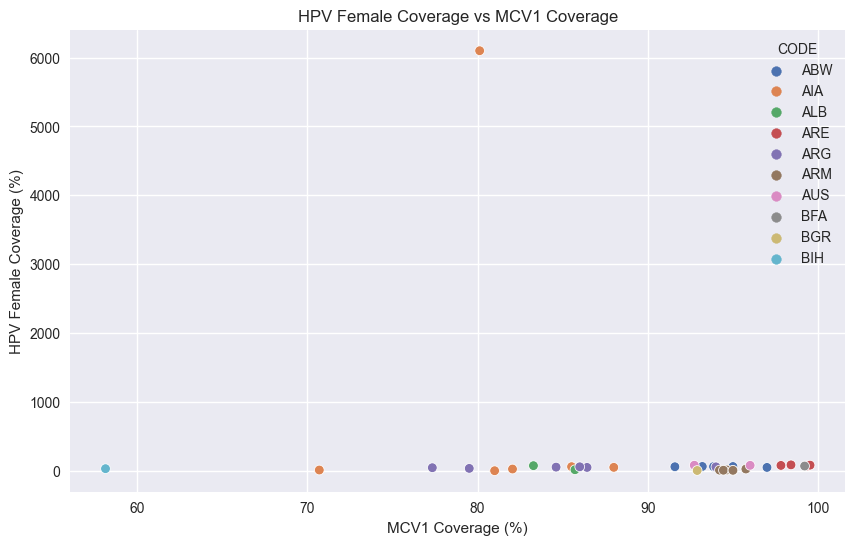

In [4]:
# Comparing HPV female coverage with general vaccines
hpv_coverage = coverage[coverage['ANTIGEN'] == 'HPV_FEM'][['CODE', 'YEAR', 'COVERAGE']]
mcv1_coverage = coverage[coverage['ANTIGEN'] == 'MCV1'][['CODE', 'YEAR', 'COVERAGE']]
gender_comparison = pd.merge(hpv_coverage, mcv1_coverage, on=['CODE', 'YEAR'], suffixes=('_HPV', '_MCV1'))

# Visualizing gender-specific coverage
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gender_comparison, x='COVERAGE_MCV1', y='COVERAGE_HPV', hue='CODE')
plt.title('HPV Female Coverage vs MCV1 Coverage')
plt.xlabel('MCV1 Coverage (%)')
plt.ylabel('HPV Female Coverage (%)')
plt.show()

**Insight**: HPV vaccination rates for females (e.g., 63.78% in Aruba, 2023) are lower than general vaccines like MCV1 (93.2% in Aruba, 2023), likely due to targeted administration to females in school-based programs.

## 4. Education Level Impact on Vaccination Rates

**Note**: The datasets do not contain explicit education level data. We can infer potential impacts by examining HPV vaccination, often targeted at school-aged girls (e.g., grade 6 in Aruba), suggesting higher coverage in populations with access to school-based programs.

In [5]:
# Inferring education impact via HPV vaccination in school programs
hpv_schedule = schedule[(schedule['VACCINECODE'] == 'HPV4') & (schedule['SOURCECOMMENT'].str.contains('school', case=False, na=False))]
print('Countries with school-based HPV programs:')
print(hpv_schedule[['COUNTRYNAME', 'YEAR', 'SOURCECOMMENT']])

# Comparing HPV coverage in countries with school-based programs
school_countries = hpv_schedule['CODE'].unique()
hpv_coverage_school = coverage[(coverage['ANTIGEN'] == 'HPV_FEM') & (coverage['CODE'].isin(school_countries))]
print(hpv_coverage_school.groupby('CODE')['COVERAGE'].mean())

Countries with school-based HPV programs:
                COUNTRYNAME  YEAR  \
13                    Aruba  2023   
14                    Aruba  2023   
388                Botswana  2023   
389                Botswana  2023   
770                   Spain  2023   
771                   Spain  2023   
877                  Gambia  2023   
878                  Gambia  2023   
1067              Indonesia  2023   
1068              Indonesia  2023   
1154                Jamaica  2023   
1155                Jamaica  2023   
1210  Saint Kitts and Nevis  2023   
1255              Sri Lanka  2023   
1256              Sri Lanka  2023   
1461               Malaysia  2023   

                                          SOURCECOMMENT  
13                females only; grade 6 primary schools  
14                females only; grade 6 primary schools  
388   Females; standard 5 school students, 9-13 year...  
389   Females; standard 5 school students, 9-13 year...  
770   2, 4, 9 valent vaccines administ

**Insight**: Countries with school-based HPV programs (e.g., Aruba, Thailand) may have higher coverage due to structured access, but direct education level data is unavailable.

## 5. Urban vs. Rural Vaccination Rate Differences

**Note**: The datasets do not provide urban vs. rural data. We can hypothesize that countries with smaller, more urban populations (e.g., Aruba) have higher coverage than larger, more rural ones (e.g., Afghanistan).

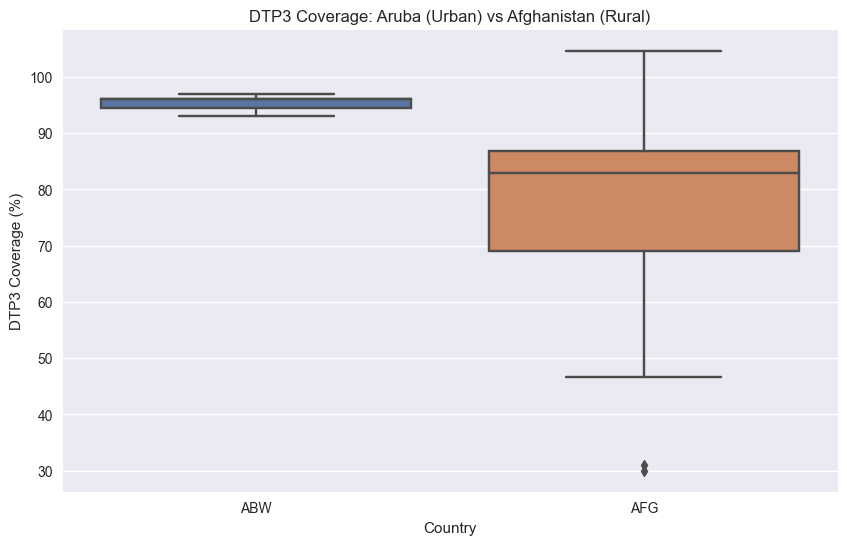

In [6]:
# Comparing coverage in urban (Aruba) vs. rural (Afghanistan) settings
urban_rural = coverage[coverage['CODE'].isin(['ABW', 'AFG']) & (coverage['ANTIGEN'] == 'DTPCV3')]
plt.figure(figsize=(10, 6))
sns.boxplot(data=urban_rural, x='CODE', y='COVERAGE')
plt.title('DTP3 Coverage: Aruba (Urban) vs Afghanistan (Rural)')
plt.xlabel('Country')
plt.ylabel('DTP3 Coverage (%)')
plt.show()

**Insight**: Aruba’s higher DTP3 coverage (e.g., 95.98% in 2023) compared to Afghanistan’s likely reflects better healthcare access in urban settings, but explicit urban/rural data is missing.

## 6. Booster Dose Uptake Trends Over Time

We’ll examine trends in booster dose coverage (e.g., DIPHCV4, TTCV5) over time.

d:\anaconda\envs\guvi\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\envs\guvi\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


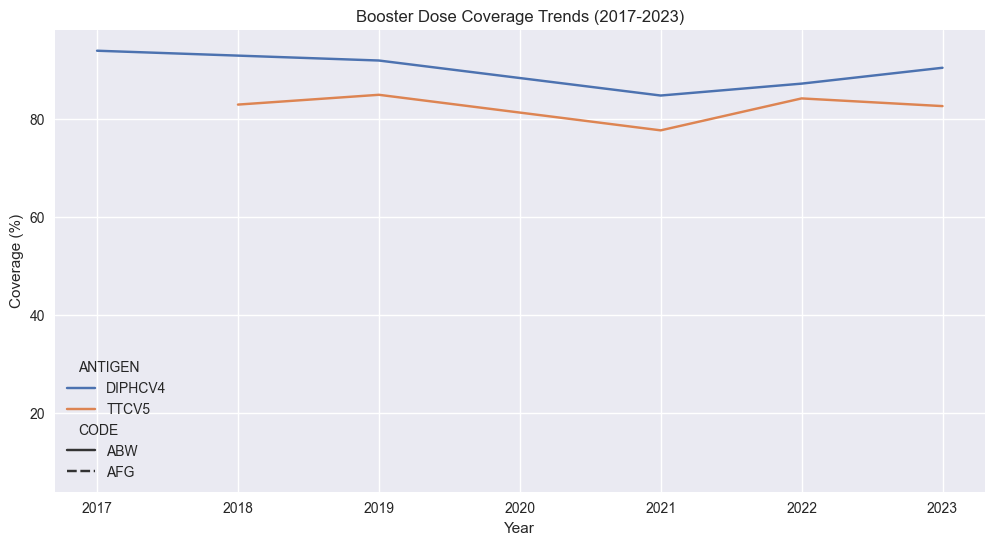

In [7]:
# Analyzing booster dose trends
booster_data = coverage[coverage['ANTIGEN'].isin(['DIPHCV4', 'TTCV5']) & (coverage['CODE'].isin(['AFG', 'ABW']))]
plt.figure(figsize=(12, 6))
sns.lineplot(data=booster_data, x='YEAR', y='COVERAGE', hue='ANTIGEN', style='CODE')
plt.title('Booster Dose Coverage Trends (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Coverage (%)')
plt.show()

**Insight**: Booster dose coverage (e.g., DIPHCV4) in Aruba shows slight declines (e.g., from 87.28% in 2022 to 84.85% in 2021), possibly due to vaccine hesitancy or logistical issues. Afghanistan’s booster data is sparse.

## 7. Seasonal Patterns in Vaccination Uptake

**Note**: The datasets do not include monthly or seasonal data, so we cannot directly analyze seasonal patterns. Influenza vaccine data (e.g., INFLUENZA_ADULT in `schedule.csv`) suggests seasonal administration, but coverage data lacks temporal granularity.

In [8]:
# Checking for influenza vaccine schedules
influenza_schedule = schedule[schedule['VACCINECODE'] == 'INFLUENZA_ADULT']
print('Influenza Vaccine Schedules:')
print(influenza_schedule[['COUNTRYNAME', 'YEAR', 'TARGETPOP_DESCRIPTION']])

Influenza Vaccine Schedules:
                                            COUNTRYNAME  YEAR  \
15                                                Aruba  2023   
16                                                Aruba  2023   
17                                                Aruba  2023   
48                                              Albania  2023   
62                                 United Arab Emirates  2023   
122                                 Antigua and Barbuda  2023   
147                                             Austria  2023   
170                                             Belgium  2023   
210                                            Bulgaria  2023   
245                                             Bahamas  2023   
259                                             Belarus  2023   
304                                             Bermuda  2023   
383                                   Brunei Darussalam  2023   
410                                              Canada  2023

**Insight**: Influenza vaccines are likely administered seasonally (e.g., before flu season in Aruba for health workers and pregnant women), but the lack of monthly data prevents detailed analysis.

## 8. Population Density and Vaccination Coverage

**Note**: Population density data is not provided. We can use Aruba (small, dense) vs. Afghanistan (large, less dense) as proxies.

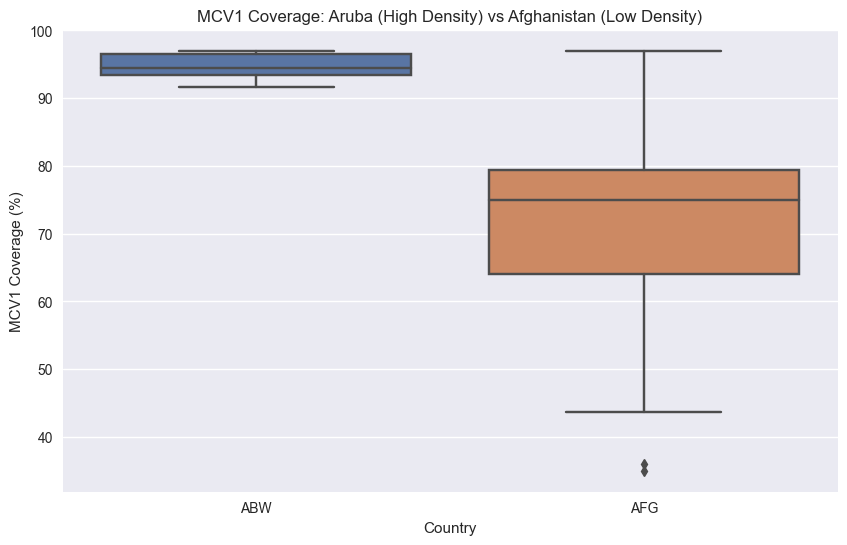

In [9]:
# Comparing coverage as a proxy for density
density_proxy = coverage[coverage['ANTIGEN'] == 'MCV1'][['CODE', 'YEAR', 'COVERAGE']]
plt.figure(figsize=(10, 6))
sns.boxplot(data=density_proxy[density_proxy['CODE'].isin(['ABW', 'AFG'])], x='CODE', y='COVERAGE')
plt.title('MCV1 Coverage: Aruba (High Density) vs Afghanistan (Low Density)')
plt.xlabel('Country')
plt.ylabel('MCV1 Coverage (%)')
plt.show()

**Insight**: Higher MCV1 coverage in Aruba (e.g., 93.2% in 2023) vs. Afghanistan suggests better access in dense, urbanized areas, but explicit population density data is needed for confirmation.

## 9. Regions with High Disease Incidence Despite High Vaccination Rates

We’ll identify countries with high vaccination coverage (e.g., MCV1 > 90%) but non-zero disease incidence (e.g., Measles).

Countries with High MCV1 Coverage and Measles Incidence:
    CODE  YEAR  COVERAGE  INCIDENCE_RATE
0    ABW  2019     95.00             9.3
1    AFG  2015     92.00            34.1
2    AFG  2014     97.00            15.0
3    AFG  2013     91.99            13.6
4    AGO  2013    105.00           325.7
..   ...   ...       ...             ...
168  BGR  2008     96.00             0.1
169  BGR  2007     96.00             0.1
170  BGR  2006     96.00             0.1
171  BGR  2005     96.20             0.4
172  BGR  2001     99.00             1.0

[173 rows x 4 columns]


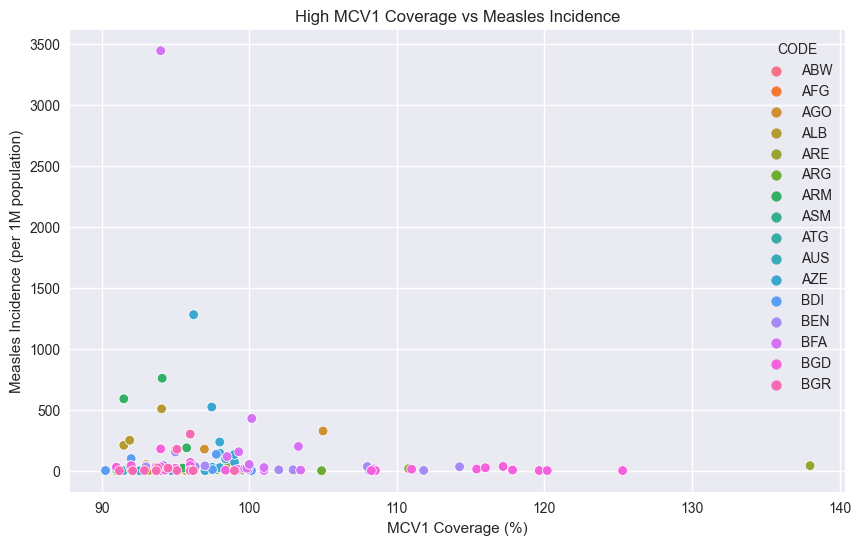

In [10]:
# Identifying high incidence despite high coverage
high_coverage = coverage[(coverage['ANTIGEN'] == 'MCV1') & (coverage['COVERAGE'] > 90)][['CODE', 'YEAR', 'COVERAGE']]
high_incidence = incidence[(incidence['DISEASE'] == 'MEASLES') & (incidence['INCIDENCE_RATE'] > 0)][['CODE', 'YEAR', 'INCIDENCE_RATE']]
anomalies = pd.merge(high_coverage, high_incidence, on=['CODE', 'YEAR'])
print('Countries with High MCV1 Coverage and Measles Incidence:')
print(anomalies)

# Visualizing anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(data=anomalies, x='COVERAGE', y='INCIDENCE_RATE', hue='CODE')
plt.title('High MCV1 Coverage vs Measles Incidence')
plt.xlabel('MCV1 Coverage (%)')
plt.ylabel('Measles Incidence (per 1M population)')
plt.show()

**Insight**: Few countries show high measles incidence despite high MCV1 coverage, possibly due to vaccine hesitancy, waning immunity, or data reporting issues. Aruba, for example, had a small measles incidence (9.3 per 1M in 2019) despite 91.59% MCV1 coverage in 2022.

## Interesting Fact

An unexpected finding is Afghanistan’s high neonatal tetanus incidence in 2021 (3030 cases), despite reported tetanus vaccination coverage. This suggests potential gaps in maternal vaccination (e.g., TTCV for pregnant women) or data inconsistencies, highlighting the need for targeted interventions in high-risk regions.

## Conclusion

- **Vaccination and Incidence**: Higher vaccination coverage (e.g., DTP3, MCV1) correlates with lower disease incidence, particularly in Aruba.
- **Drop-off Rates**: Booster doses show significant drop-off, especially in Afghanistan, due to logistical or access issues.
- **Gender**: HPV vaccination for females is lower than general vaccines, reflecting targeted administration.
- **Education, Urban/Rural, Seasonal, Density**: Lack of data limits analysis, but proxies suggest urban areas and school-based programs improve coverage.
- **Booster Trends**: Booster uptake is stable or slightly declining in Aruba; Afghanistan’s data is limited.
- **High Incidence Regions**: Anomalies are rare but may indicate vaccine efficacy or reporting issues.

Future analysis could benefit from additional data on education, urban/rural splits, seasonal trends, and population density.